**Aplicación de proyección de caudales usando la metodología ARIMA**

Referencia: How to Create an ARIMA Model for Time Series Forecasting

Link:https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Semana
2000-00     69.30963
2000-01     59.81791
2000-02     61.95215
2000-03     96.10415
2000-04    253.08719
Name: Caudal, dtype: float64


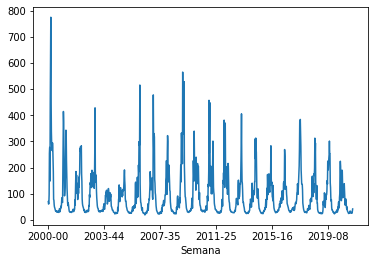

In [ ]:
import calendar
from datetime import datetime
from pandas import read_csv
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x,"%Y-%U")

series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

Correlación de datos

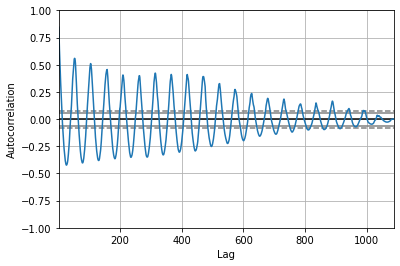

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime(x, '%Y-%U')
 
series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

MODELO ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.Caudal   No. Observations:                 1086
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -5864.986
Method:                       css-mle   S.D. of innovations             53.572
Date:                Sat, 14 Nov 2020   AIC                          11743.972
Time:                        00:11:29   BIC                          11778.903
Sample:                             2   HQIC                         11757.195
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0237      0.435     -0.055      0.957      -0.876       0.828
ar.L1.D2.Caudal    -0.9411      0.030    -31.104      0.000      -1.000      -0.882
ar.L2.D2.Caudal    -0.7979      

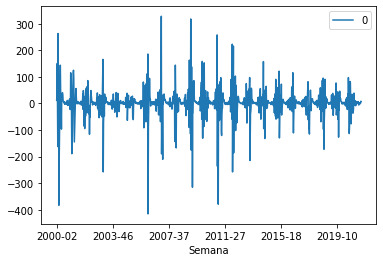

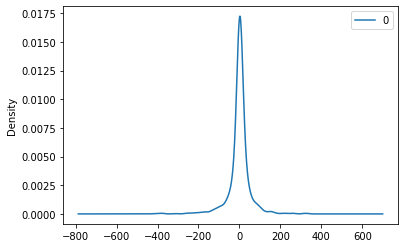

                 0
count  1086.000000
mean      0.093898
std      53.633478
min    -415.499489
25%      -7.190547
50%       2.028155
75%      12.198690
max     328.182323


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, '%Y-%U')
 
series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

FORECASTING CON ARIMA

p 1
d 0
q 0
Test MSE: 739.200
Test MAE: 19.300


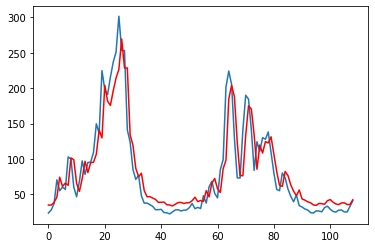

p 1
d 0
q 1
Test MSE: 760.900
Test MAE: 19.290


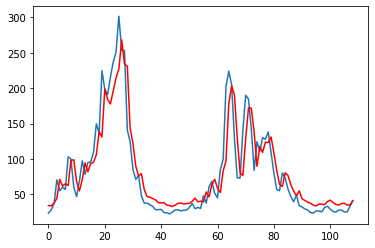

p 1
d 0
q 2
Test MSE: 764.550
Test MAE: 19.310


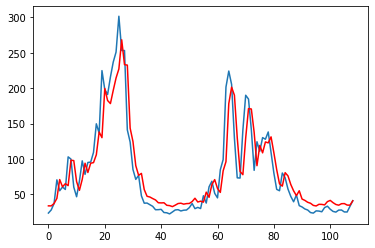

p 1
d 0
q 3
Test MSE: 781.690
Test MAE: 19.480


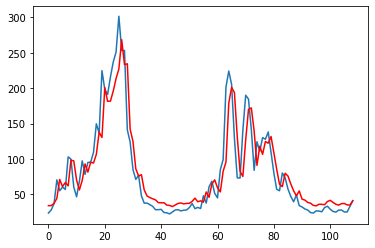

p 1
d 1
q 0
Test MSE: 791.660
Test MAE: 17.370


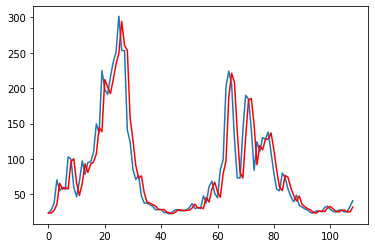

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


p 1
d 1
q 1
Test MSE: 746.630
Test MAE: 18.450


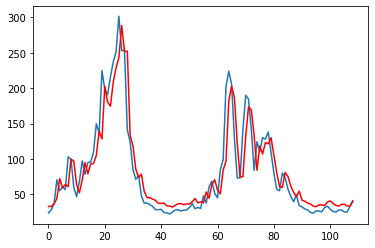

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


p 1
d 1
q 2
Test MSE: 759.400
Test MAE: 18.770


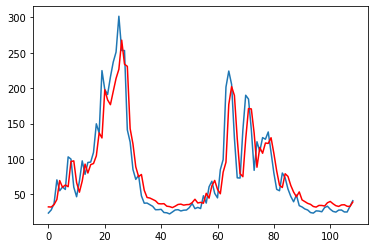

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


p 1
d 1
q 3
Test MSE: 763.330
Test MAE: 18.820


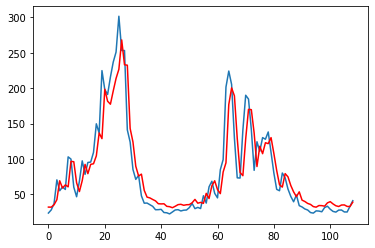

p 2
d 0
q 0
Test MSE: 757.690
Test MAE: 19.280


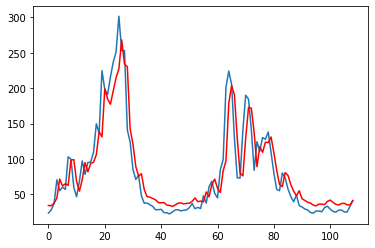

p 2
d 0
q 1
Test MSE: 762.260
Test MAE: 19.290


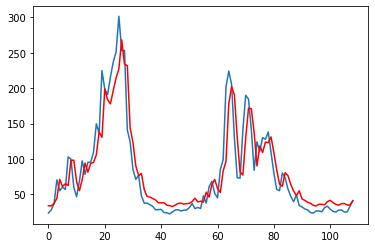

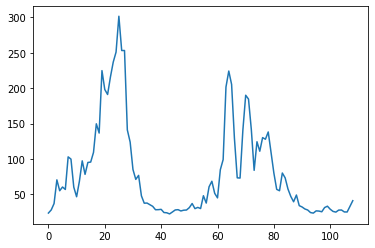

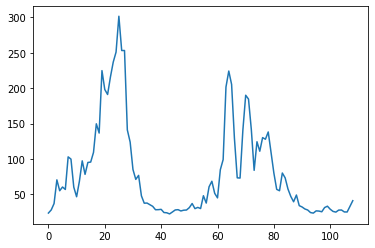

p 2
d 1
q 0
Test MSE: 818.960
Test MAE: 17.530


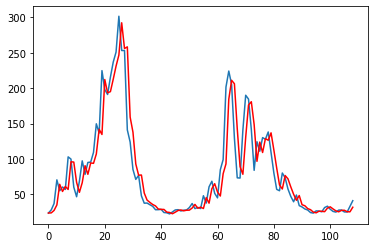

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p 2
d 1
q 1
Test MSE: 756.100
Test MAE: 18.740


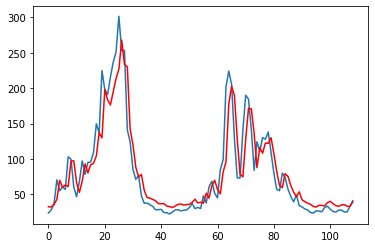

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p 2
d 1
q 2
Test MSE: 772.820
Test MAE: 18.630


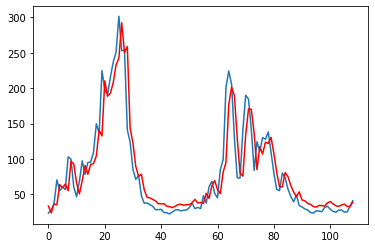

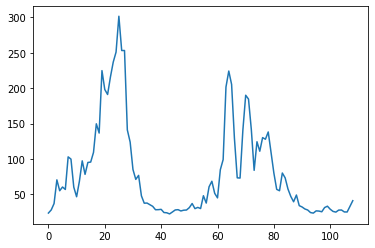

p 3
d 0
q 0
Test MSE: 768.840
Test MAE: 19.350


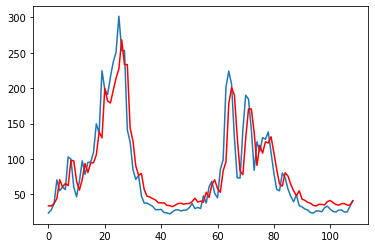

p 3
d 0
q 1
Test MSE: 779.970
Test MAE: 19.440


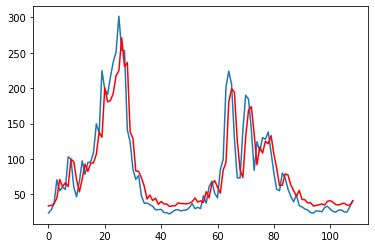

p 3
d 0
q 2
Test MSE: 763.840
Test MAE: 19.310


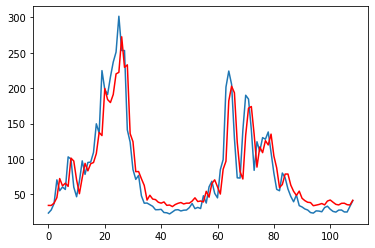

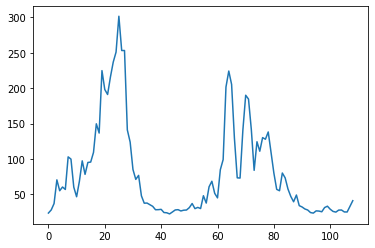

p 3
d 1
q 0
Test MSE: 804.520
Test MAE: 17.480


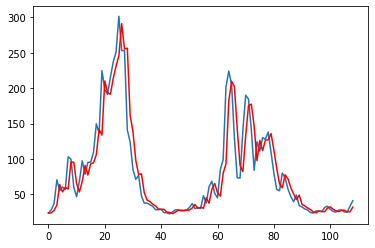

p 3
d 1
q 1
Test MSE: 767.780
Test MAE: 18.860


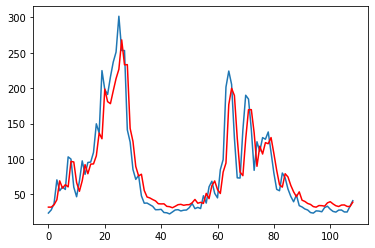

p 3
d 1
q 2
Test MSE: 778.870
Test MAE: 18.940


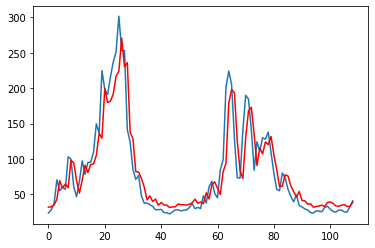

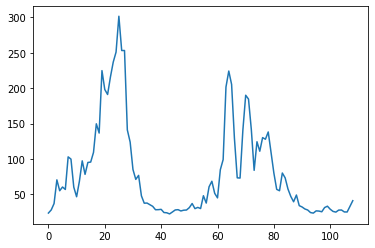

p 4
d 0
q 0
Test MSE: 772.120
Test MAE: 19.380


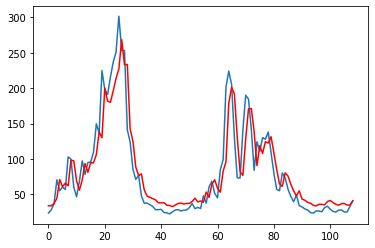

p 4
d 0
q 1
Test MSE: 755.580
Test MAE: 19.400


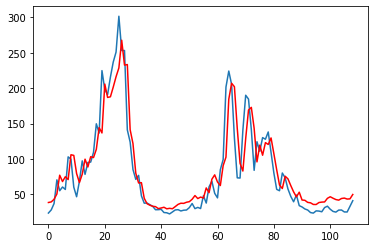

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:51

p 4
d 0
q 2
Test MSE: 745.040
Test MAE: 18.630


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


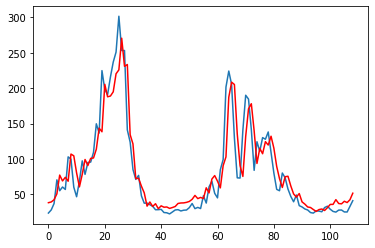

p 4
d 0
q 3
Test MSE: 839.590
Test MAE: 19.910


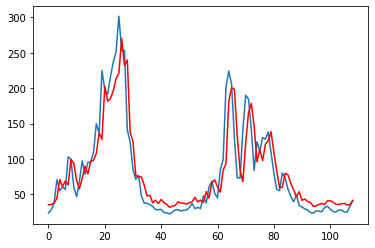

p 4
d 1
q 0
Test MSE: 799.410
Test MAE: 17.450


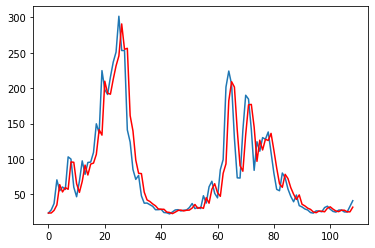

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


p 4
d 1
q 1
Test MSE: 770.850
Test MAE: 18.890


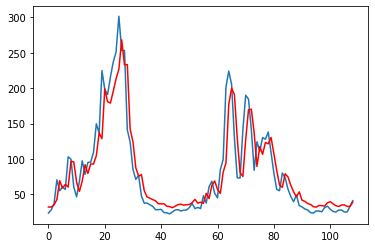

p 4
d 1
q 2
Test MSE: 779.340
Test MAE: 18.940


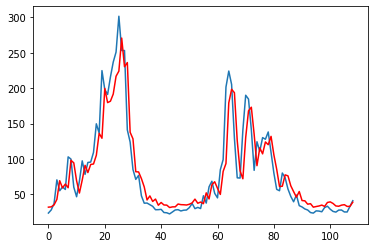

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianI

p 4
d 1
q 3
Test MSE: 762.970
Test MAE: 17.620


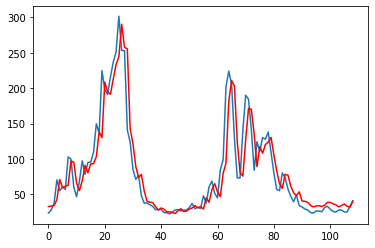

+-----------------------------------------------+
|     p     d     q        MSE        MAE       |
|-----------------------------------------------|
|     1     0     0      739.2       19.3       |
|     1     0     1      760.9      19.29       |
|     1     0     2     764.55      19.31       |
|     1     0     3     781.69      19.48       |
|     1     1     0     791.66      17.37       |
|     1     1     1     746.63      18.45       |
|     1     1     2      759.4      18.77       |
|     1     1     3     763.33      18.82       |
|     2     0     0     757.69      19.28       |
|     2     0     1     762.26      19.29       |
|     2     1     0     818.96      17.53       |
|     2     1     1      756.1      18.74       |
|     2     1     2     772.82      18.63       |
|     3     0     0     768.84      19.35       |
|     3     0     1     779.97      19.44       |
|     3     0     2     763.84      19.31       |
|     3     1     0     804.52      17.48       |


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

def parser(x):
	return datetime.strptime(x, '%Y-%U')

Tabla = """\
+-----------------------------------------------+
|     p     d     q        MSE        MAE       |
|-----------------------------------------------|
{}
+-----------------------------------------------+\
"""

ListaResultado = []
contador=0


for p in range(1,5):
  for d in range(0,2):
    for q in range(0,4):
      contador=contador+1
      series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
      X = series.values
      size = int(len(X) * 0.90)
      train, test = X[0:size], X[size:len(X)]
      history = [x for x in train]
      predictions = list()
      try:
        for t in range(len(test)):
          model = ARIMA(history, order=(p,d,q))
          model_fit = model.fit(disp=0)
          output = model_fit.forecast()
          yhat = output[0]
          predictions.append(yhat)
          obs = test[t]
          history.append(obs)
          "print('predicted=%f, expected=%f' % (yhat, obs))"
        MSE = round(mean_squared_error(test, predictions),2)
        MAE = round(mean_absolute_error(test, predictions),2)
        ListaResultado.insert(contador,[p, d, q, MSE, MAE])
        print("========================================")
        print("p",p)
        print("d",d)
        print("q",q)
        print('Test MSE: %.3f'% MSE)
        print('Test MAE: %.3f'% MAE)
      except:pass  
      # plot
      pyplot.plot(test)
      pyplot.plot(predictions, color='red')
      pyplot.show()


Tabla = (Tabla.format('\n'.join("| {:>5} {:>5} {:>5} {:>10} {:>10}       |".format(*fila)
for fila in ListaResultado)))
print(Tabla)

p 5
d 0
q 0
Test MSE: 784.250
Test MAE: 19.560


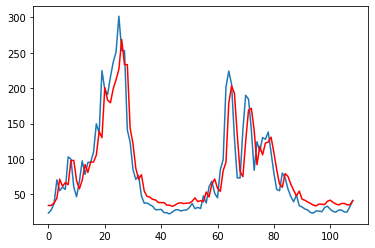

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p 5
d 0
q 1
Test MSE: 737.820
Test MAE: 19.150


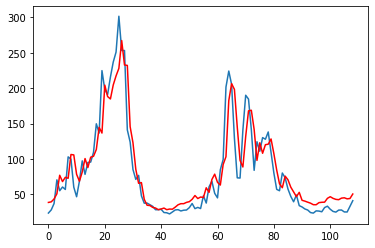

p 5
d 0
q 2
Test MSE: 767.500
Test MAE: 19.330


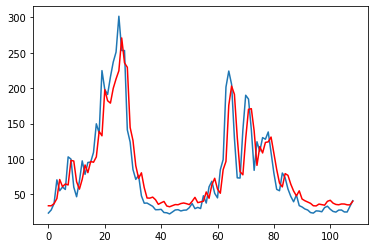

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianI

p 5
d 0
q 3
Test MSE: 749.890
Test MAE: 19.370


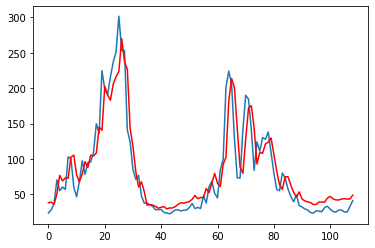

p 5
d 1
q 0
Test MSE: 802.010
Test MAE: 17.370


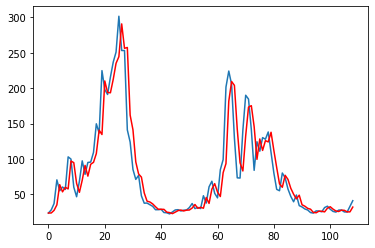

p 5
d 1
q 1
Test MSE: 819.300
Test MAE: 17.410


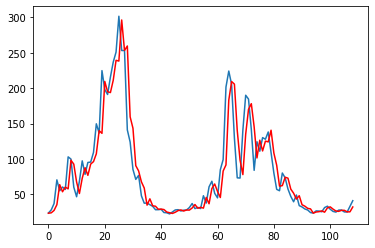

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/ts

p 5
d 1
q 2
Test MSE: 746.660
Test MAE: 18.610


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


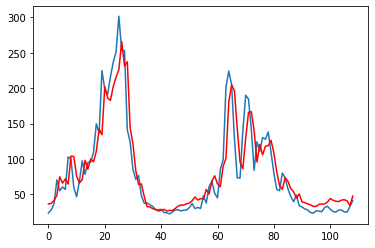

p 5
d 1
q 3
Test MSE: 827.200
Test MAE: 17.500


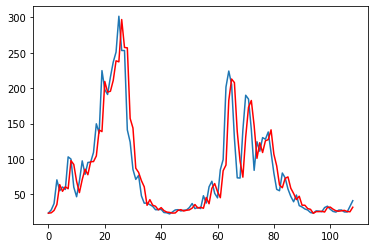

p 6
d 0
q 0
Test MSE: 792.510
Test MAE: 19.710


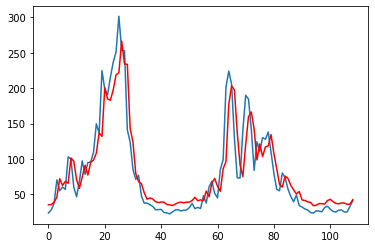

p 6
d 0
q 1
Test MSE: 806.920
Test MAE: 19.620


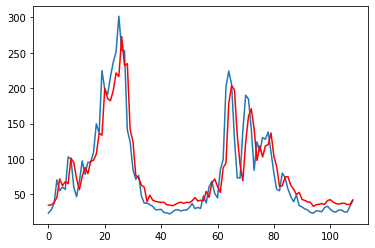

p 6
d 0
q 2
Test MSE: 805.380
Test MAE: 19.590


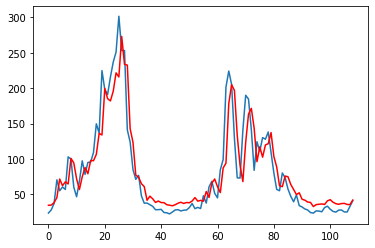

p 6
d 0
q 3
Test MSE: 743.310
Test MAE: 19.110


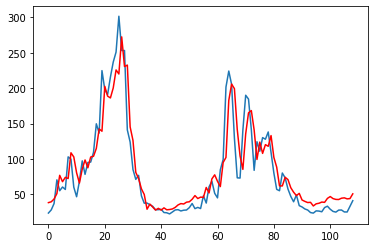

p 6
d 1
q 0
Test MSE: 845.590
Test MAE: 17.940


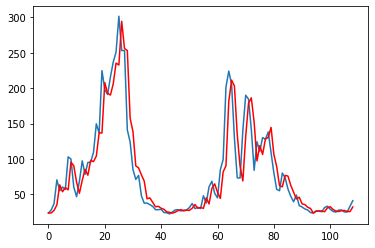

p 6
d 1
q 1
Test MSE: 844.310
Test MAE: 17.930


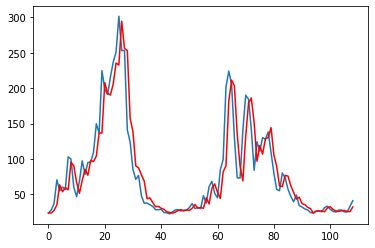

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


p 6
d 1
q 2
Test MSE: 807.480
Test MAE: 18.810


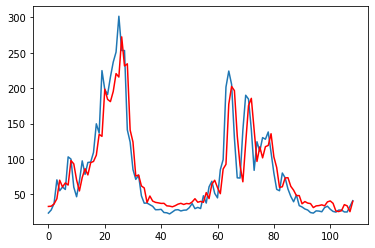

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p 6
d 1
q 3
Test MSE: 803.410
Test MAE: 19.000


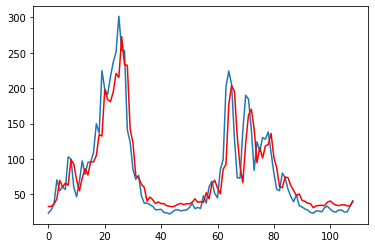

p 7
d 0
q 0
Test MSE: 815.010
Test MAE: 19.700


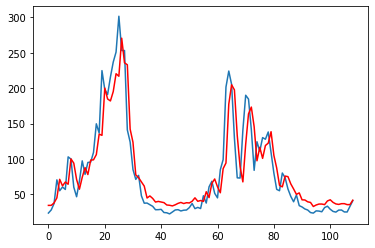

p 7
d 0
q 1
Test MSE: 809.500
Test MAE: 19.610


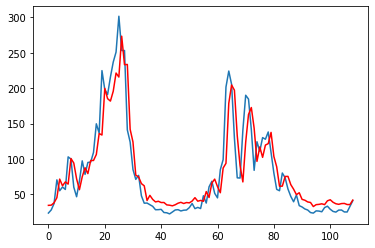

p 7
d 0
q 2
Test MSE: 806.360
Test MAE: 19.580


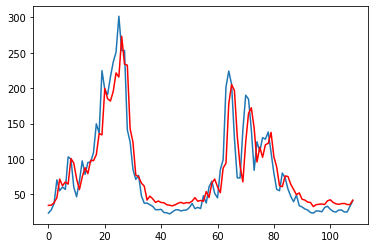

p 7
d 0
q 3
Test MSE: 751.540
Test MAE: 19.190


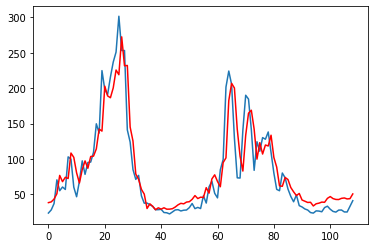

p 7
d 1
q 0
Test MSE: 844.480
Test MAE: 17.930


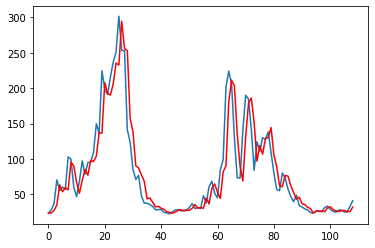

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianI

p 7
d 1
q 1
Test MSE: 809.840
Test MAE: 18.890


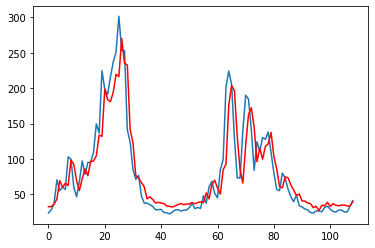

p 7
d 1
q 2
Test MSE: 807.790
Test MAE: 19.020


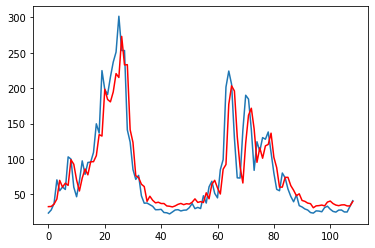

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianI

p 7
d 1
q 3
Test MSE: 795.710
Test MAE: 18.920


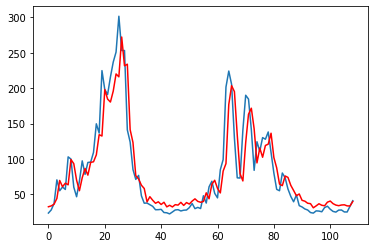

+-----------------------------------------------+
|     p     d     q        MSE        MAE       |
|-----------------------------------------------|
|     5     0     0     784.25      19.56       |
|     5     0     1     737.82      19.15       |
|     5     0     2      767.5      19.33       |
|     5     0     3     749.89      19.37       |
|     5     1     0     802.01      17.37       |
|     5     1     1      819.3      17.41       |
|     5     1     2     746.66      18.61       |
|     5     1     3      827.2       17.5       |
|     6     0     0     792.51      19.71       |
|     6     0     1     806.92      19.62       |
|     6     0     2     805.38      19.59       |
|     6     0     3     743.31      19.11       |
|     6     1     0     845.59      17.94       |
|     6     1     1     844.31      17.93       |
|     6     1     2     807.48      18.81       |
|     6     1     3     803.41       19.0       |
|     7     0     0     815.01       19.7       |


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

def parser(x):
	return datetime.strptime(x, '%Y-%U')

Tabla = """\
+-----------------------------------------------+
|     p     d     q        MSE        MAE       |
|-----------------------------------------------|
{}
+-----------------------------------------------+\
"""

ListaResultado = []
contador=0


for p in range(5,8):
  for d in range(0,2):
    for q in range(0,4):
      contador=contador+1
      series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
      X = series.values
      size = int(len(X) * 0.90)
      train, test = X[0:size], X[size:len(X)]
      history = [x for x in train]
      predictions = list()
      try:
        for t in range(len(test)):
          model = ARIMA(history, order=(p,d,q))
          model_fit = model.fit(disp=0)
          output = model_fit.forecast()
          yhat = output[0]
          predictions.append(yhat)
          obs = test[t]
          history.append(obs)
          "print('predicted=%f, expected=%f' % (yhat, obs))"
        MSE = round(mean_squared_error(test, predictions),2)
        MAE = round(mean_absolute_error(test, predictions),2)
        ListaResultado.insert(contador,[p, d, q, MSE, MAE])
        print("========================================")
        print("p",p)
        print("d",d)
        print("q",q)
        print('Test MSE: %.3f'% MSE)
        print('Test MAE: %.3f'% MAE)
      except:pass  
      # plot
      pyplot.plot(test)
      pyplot.plot(predictions, color='red')
      pyplot.show()


Tabla = (Tabla.format('\n'.join("| {:>5} {:>5} {:>5} {:>10} {:>10}       |".format(*fila)
for fila in ListaResultado)))
print(Tabla)

CÓDIGO BACK UP

In [ ]:
print("%8.2f" %65121515.513131313)
ListasAlumnos = []

ListasAlumnos.insert(1,['Juan', 'Carmelo', 5, 7, 9, 7])

65121515.51


In [ ]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime(x, '%Y-%U')


for p in range(1,3):
  for d in range(0,2):
    for q in range(0,3):
      series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
      X = series.values
      size = int(len(X) * 0.9)
      train, test = X[0:size], X[size:len(X)]
      history = [x for x in train]
      predictions = list()
      for t in range(len(test)):
	      model = ARIMA(history, order=(p,d,q))
	      model_fit = model.fit(disp=0)
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      print('predicted=%f, expected=%f' % (yhat, obs))
      error = mean_squared_error(test, predictions)
      print('Test MSE: %.3f' % error)
      # plot
      pyplot.plot(test)
      pyplot.plot(predictions, color='red')
      pyplot.show()

Test MSE: 767.497


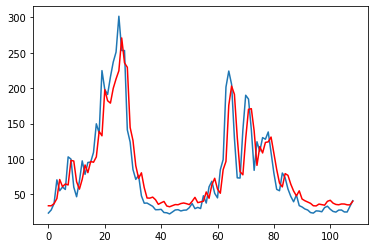

In [ ]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime(x, '%Y-%U')


series = read_csv('Caudales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
try:
  for t in range(len(test)):
    model = ARIMA(history, order=(5,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    "print('predicted=%f, expected=%f' % (yhat, obs))"
  error = mean_squared_error(test, predictions)
  print('Test MSE: %.3f' % error)
  # plot
  pyplot.plot(test)
  pyplot.plot(predictions, color='red')
  pyplot.show()
except:pass